In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
import numpy as np

In [7]:
filepath="/content/drive/MyDrive/data/suretrust project/stale_banana.h5"

In [9]:
model1=tf.keras.models.load_model("/content/drive/MyDrive/data/suretrust project/stale_banana.h5")

In [11]:
classes=["fresh","not-fresh"]
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 48)        

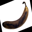

In [14]:
img=Image.open("/content/drive/MyDrive/data/suretrust project/rotated_by_15_Screen Shot 2018-06-12 at 8.47.28 PM.jpg")
img
img=img.resize((32,32))
img


In [20]:
def Pred(final):
  image = Image.open(final)
  image = image.resize((32,32))
  test = tf.reshape(tf.constant(np.array(image)/255), (-1,32,32,3))
  preds = model1.predict(test, verbose=False)[0]*100
  preds = tf.math.round(preds)
  confidence = tf.reduce_max(preds)
  index = int(tf.where(preds == confidence)[0][0])
  pred = classes[index]
  return f"status of fruit is {pred.title()} and it's confidence is {int(confidence)}%"

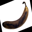

In [21]:
img=Image.open("/content/drive/MyDrive/data/suretrust project/rotated_by_15_Screen Shot 2018-06-12 at 8.47.28 PM.jpg")
img=img.resize((32,32))
img

In [22]:
Pred("/content/drive/MyDrive/data/suretrust project/rotated_by_15_Screen Shot 2018-06-12 at 8.47.28 PM.jpg")

"status of fruit is Not-Fresh and it's confidence is 100%"